<a href="https://colab.research.google.com/github/preston-cell/vhs-intro-ai/blob/main/road_network_analysis_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate a Road Network Graph Using `osmnx`
In this coding challenge, we are going to work with road network data from [OpenStreetMap](https://www.openstreetmap.org/#map=4/38.01/-95.84) using the [osmnx](https://osmnx.readthedocs.io/en/stable/index.html) python package.

*You need to answer ALL question prompts in this notebook. Question prompts are all italicized.*



### 1. Install the `osmnx` Library

Before you begin, ensure that the `osmnx` library is installed. You can do this by running the following command:




```
!pip install osmnx
```



In [ ]:
!pip install osmnx

### 2. Import the Required Libraries
Next, you will need to import the necessary libraries in your Python code, and check the version.

In [ ]:
import osmnx as ox
ox.__version__

'1.9.4'

### 3. Generate the Graph for a Specific Location

Now, you will generate a road network graph from a specific address.

In this example, we will use the school address: "13051 Whittington Drive, Houston, TX" and generate a graph of roads within a 5,000-meter radius (5 km). We will use the `ox.graph.graph_from_address()` method. (See documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html)

* `address`: This is the starting location around which the graph will be generated. You can replace this address with any other address.
* `dist`: This specifies the radius (in meters) around the address for which the network will be created. In this case, the radius is 5,000 meters (or 5 km).
* `network_type`: This specifies the type of network you want to extract. Options include:
  * "drive": For driving (car) routes.
  * "walk": For pedestrian routes.
  * "bike": For cycling routes.
  * "all": For all types of routes.

In [ ]:
# Add code in the blanks
address = '13051 Whittington Drive, Houston, TX'
dist = 5000
dist_type = 'bbox'
network_type = 'all'
G = ox.graph_from_address(address, dist, dist_type, network_type)

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


### 4. Visualize the graph
We will use the `ox.project_graph()` and `ox.plot_graph()` methods to visualize the graph.

*4.1 Modify the `node_size` parameter. How does it change the visualisation?*
The white circles (presumably nodes) get larger as node size increases. This may help when trying to disinguish if a certain point is a node, but if there are too many in one spot it can get confusing.

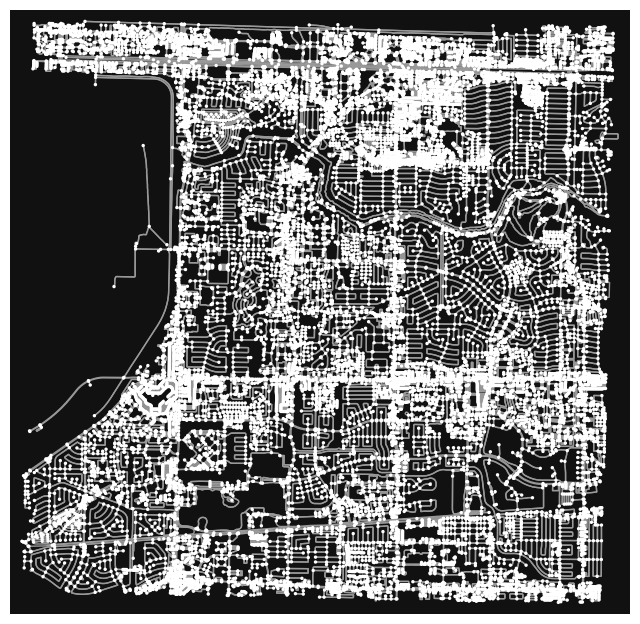

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
Gp = ox.project_graph(G)
ox.plot_graph(Gp, node_size=6)

### 5. Analyze the graph

*5.1 How many nodes are in the graph? [Use: `G.nodes()`]*
23447

In [ ]:
nodes_list = list(G.nodes())
print(len(nodes_list))

23459


*5.2 How many edges are in the graph? [Use: `G.edges`]*
59793

In [ ]:
edges_list = list(G.edges())
print(len(edges_list))

59827


*5.3 What information does the node store? Run the code below to get the information for the first node in the graph.* Each node holds the x and y coordinate, and the street count: perhaps how many streets intersect the node?

In [ ]:
current_node = nodes_list[0]
print(f"Node {current_node}: {G.nodes[current_node]}")

Node 151365266: {'y': 29.749123, 'x': -95.5721842, 'street_count': 4}


*5.4 What information does the edge store? Is the edge weight part of this information?* It has an osm ID, if the street is one way, how many lanes it has, the name of the street, what type of highway it is, if the street is reversed, and the length of the street (potentially weight).

In [ ]:
current_edge = edges_list[0]
print(f"Edge {current_edge}: {G.edges[current_edge[0], current_edge[1], 0]}")

Edge (151365266, 8292157400): {'osmid': 422675002, 'oneway': True, 'lanes': '2', 'name': 'Wilcrest Drive', 'highway': 'secondary', 'reversed': False, 'length': 17.28}


*5.5 Create a new graph, `G_walk` by specifying `network_type` to "walk". Visualize it and compare it with the road network. How many nodes and edges does `G_walk` contain?*
It has noticably less nodes (white circles) on the graph. This is backed up by the numbers, with less nodes and less edges.

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


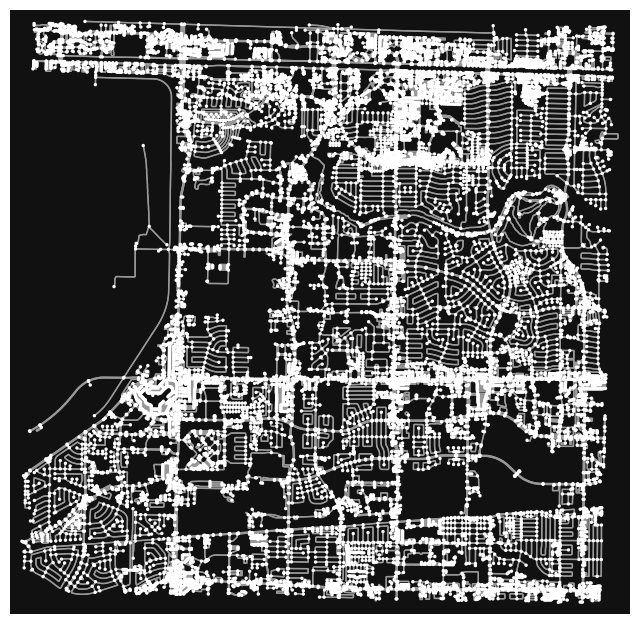

20121
57442


In [ ]:
address = '13051 Whittington Drive, Houston, TX'
dist = 5000
dist_type = 'bbox'
network_type = 'walk'
G_walk = ox.graph_from_address(address, dist, dist_type, network_type)

Gp = ox.project_graph(G_walk)
ox.plot_graph(Gp, node_size=6)
nodes_list2 = list(G_walk.nodes())
print(len(nodes_list2))
edges_list2 = list(G_walk.edges())
print(len(edges_list2))

# Shortest Path using `osmnx`

To find the shortest path, we will use the `shortest_path` method.

### 6. Setup Origin and Destination Nodes
But first, we need to specify the origin and destination using the latitude and longitude values for the location.



 Use google maps, to find the lat-long values of:
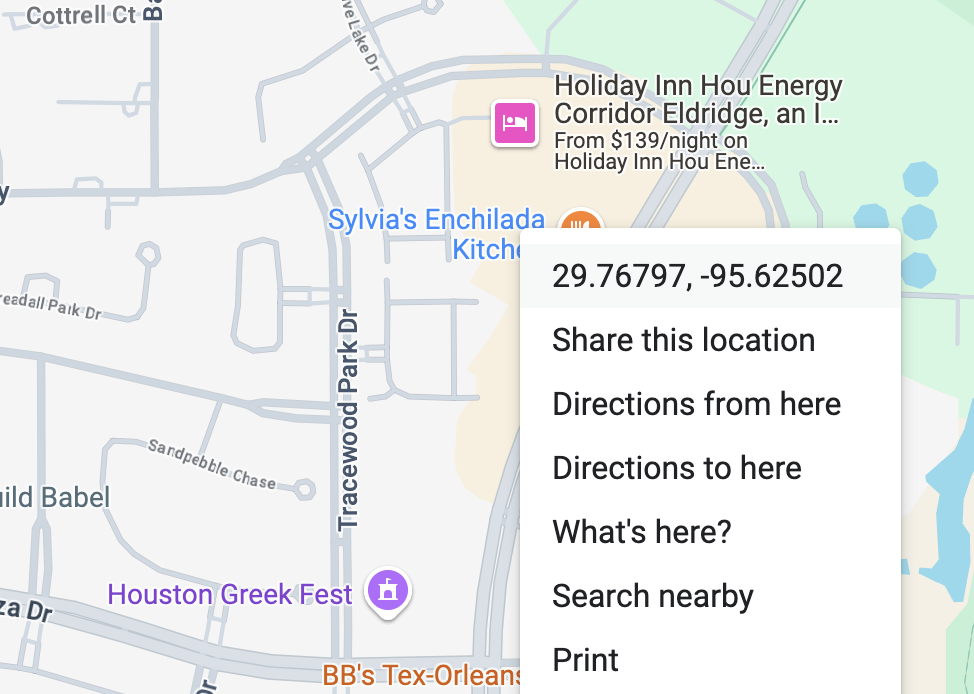
* origin - Village High School
* destination -  Sylvia's Enchilada Kitchen

*6.1 Specify the latitude & longitude as tuple.*

In [ ]:
origin = (29.746265670668397, -95.61934295280342) # Point A
destination = (29.767754432444836, -95.6244099952702) # Point B

*6.2 Next use the `nearest_nodes()` method to get the node in the graph that is nearest to the specified location. Note that `x` is longitude and `y` is latitude.*

In [ ]:
origin_node = ox.distance.nearest_nodes(G, X=origin[1], Y=origin[0])
destination_node = ox.distance.nearest_nodes(G, X=destination[1], Y=destination[0])
print(origin_node)
print(destination_node)

152217532
3980341225


### 7. Find shortest path using `osmnx` `shortest_path()` method
Now we are ready to find the shortest path between the origin and destination using the shortest_path method.

In [ ]:
route = ox.shortest_path(G, origin_node, destination_node)
print (route)

[152217532, 4732918599, 4732918604, 152230013, 152029513, 7132579305, 152059909, 3705543547, 3705543550, 152230005, 151464785, 152229991, 10877239779, 151464759, 152229982, 1211492516, 2121308489, 1211492955, 1211493041, 1211493149, 1211493042, 1211493205, 1211497513, 1211493796, 1211493711, 1211493838, 1211493859, 1211493930, 5921502238, 1211494060, 1211494213, 1211494164, 6989968699, 1211494596, 2057800632, 2057800674, 6989968702, 3980341235, 2500920441, 3980341225]


Visualise the shortest path using `plot_graph_route()` method.

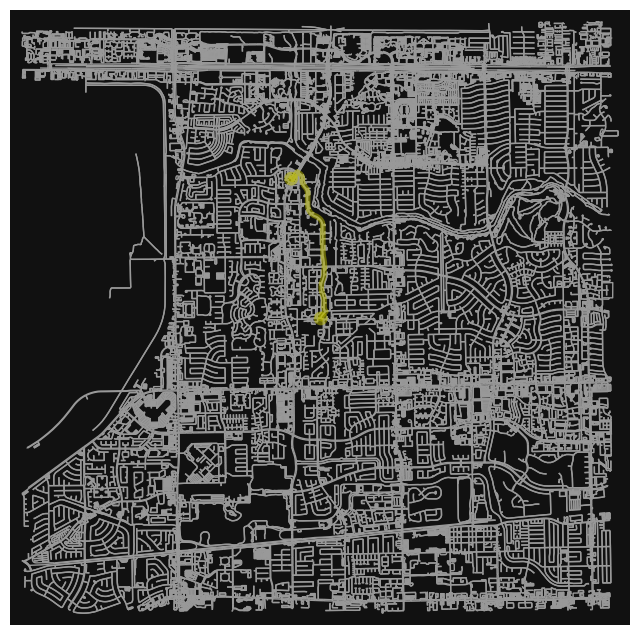

In [ ]:
ax = ox.plot_graph_route(G, route, route_color="y", node_size=0)

# Shortest Path using your Dijkstra's method



*8.1 Use the `GraphL` class that you have already created in a previous lesson in this notebook. Note that `GraphL` class should have dijkstra_shortest_path() as a method.*

In [ ]:
import heapq

class GraphL:
  def __init__(self, num_vertices, directed =False):
    self.num_vertices = num_vertices
    self.directed = directed
    self.graph = {}
    self.graph = {i: {} for i in range(num_vertices)}

  def add_edge(self, node1, node2, weight):
        if node1 in self.graph:
            self.graph[node1][node2] = weight
        if not self.directed and node2 in self.graph:
            self.graph[node2][node1] = weight

  def display(self):
    for node in self.graph:
        print(f'{node}: {self.graph[node]}')
  def add_node(self, node):
        if node not in self.graph:
            self.graph[node] = {}
  def remove_edge(self, u, v):
    if self.directed:
        if (v, weight) in self.graph[u]:
            self.graph[u].remove((v, weight))
    else:
        for weight in range (self.num_vertices):
          if (v, weight) in self.graph[u]:
              self.graph[u].remove((v, weight))
          if (u, weight) in self.graph[v]:
              self.graph[v].remove((u, weight))
  def has_edge(self, u, v):
    if self.directed:
        if v in self.graph[u]:
            return True
        else:
            return False
    else:
        if v in self.graph[u] or u in self.graph[v]:
            return True
        else:
            return False

  def get_neighbors(self, vertex):
    if vertex in self.graph:
        return self.graph[vertex].items()  # (neighbor, weight)
    return []

  def dijkstras_shortest_path_priorityqueue(G, start, end):
    # check if the start or end nodes are valid for robustness
    if start not in G.graph or end not in G.graph:
        print(f"Invalid start ({start}) or end ({end}) node.")
        return None

    # Initialize all distances to infinity
    distances = {node: float('inf') for node in G.graph}
    distances[start] = 0  # Set the distance of the start node to 0

    # Priority queue with the start node
    pq = [(0, start)]
    previous_nodes = {node: None for node in G.graph}

    while pq:
        # Find the node with the smallest distance
        current_distance, current_vertex = heapq.heappop(pq)

        # Skip if the current distance is greater than the recorded distance
        if current_distance > distances[current_vertex]:
            continue

        # Loop through neighbors of the current vertex
        for neighbor, weight in G.get_neighbors(current_vertex):  # Use get_neighbors
            # New distance to the neighbor
            distance = current_distance + weight

            # If the new distance is shorter, update and push to the priority queue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(pq, (distance, neighbor))

    # If the end node is still infinity, there's no path
    if distances[end] == float('inf'):
        print(f"There is no path between {start} and {end}")
        return None

    # Start from the end node to create the path going backwards
    path = []
    current_node = end
    while current_node is not None:
        path.insert(0, current_node)
        current_node = previous_nodes[current_node]

    print(f"Shortest path: {path}")
    print(f"Length of path: {distances[end]}")
    return path, distances[end]



*8.2 Now we will copy the nodes from the `osmnx` graph to our adjacency list graph representation.*

In [ ]:
myG = GraphL(len(nodes_list), directed=True)

In [ ]:
for node in G.nodes():
    myG.add_node(node)  # add node

    # Loop through neighbors and add edges
    for neighbor, data in G[node].items():
        for edge_data in data.values():
            # Assuming 'length' is the edge attribute (it might differ based on the graph)
            weight = edge_data.get('length', 1)  # Default to 1 if no length is found
            myG.add_edge(node, neighbor, weight)  # Add the edge

*8.3 Display the graph using the display() method in the `GraphL` class.*

In [ ]:
myG.display()

Streaming output truncated to the last 5000 lines.
6989956423: {6989956409: 9.236, 6989956420: 34.322, 6989956427: 43.663000000000004}
6989956427: {6989800613: 8.562, 6989800612: 15.837, 6989956430: 38.903, 6989956423: 43.663}
6989956430: {152025816: 9.16, 151429040: 17.304, 6989956433: 42.595, 6989956427: 38.903}
6989956433: {6989800615: 13.067, 6989800614: 9.866, 6989956430: 42.595000000000006}
6989968697: {6989968698: 3.855}
6989968698: {6989968697: 3.855, 3966015990: 7.213, 6989968699: 6.08, 6989968708: 6.487}
6989968699: {152229884: 14.087, 6989968698: 6.08, 1211494596: 6.324}
6989968700: {6989968701: 7.04, 152229884: 6.011, 6989968740: 40.813, 6989968731: 44.674}
6989968701: {6989968702: 15.412, 6989968700: 7.04, 152229876: 5.56}
6989968702: {6989968701: 15.412, 3980341235: 66.2, 6989968704: 12.523}
6989968704: {6989968705: 13.693, 2057800674: 6.17, 6989968702: 12.523}
6989968705: {6989968706: 5.835, 6989968704: 13.693, 2500920439: 164.12299999999996}
6989968706: {6989968707: 5.8

* Get the shortest path by calling `dijkstra_shortest_path()` method with the newly created `myG` graph.

* Plot the path and compare it with the output of the `shortest_path()` from the `osmnx` package.

*8.4 Compare the results.Does your implementation give the same route as that of the `osmnx` package?*

In [ ]:
myG.dijkstras_shortest_path_priorityqueue(origin_node, destination_node)

Shortest path: [152217532, 4732918599, 4732918604, 152230013, 152029513, 7132579305, 152059909, 3705543547, 3705543550, 152230005, 151464785, 152229991, 10877239779, 151464759, 152229982, 1211492516, 2121308489, 1211492955, 1211493041, 1211493149, 1211493042, 1211493205, 1211497513, 1211493796, 1211493711, 1211493838, 1211493859, 1211493930, 5921502238, 1211494060, 1211494213, 1211494164, 6989968699, 1211494596, 2057800632, 2057800674, 6989968702, 3980341235, 2500920441, 3980341225]
Length of path: 2890.0460000000003


([152217532,
  4732918599,
  4732918604,
  152230013,
  152029513,
  7132579305,
  152059909,
  3705543547,
  3705543550,
  152230005,
  151464785,
  152229991,
  10877239779,
  151464759,
  152229982,
  1211492516,
  2121308489,
  1211492955,
  1211493041,
  1211493149,
  1211493042,
  1211493205,
  1211497513,
  1211493796,
  1211493711,
  1211493838,
  1211493859,
  1211493930,
  5921502238,
  1211494060,
  1211494213,
  1211494164,
  6989968699,
  1211494596,
  2057800632,
  2057800674,
  6989968702,
  3980341235,
  2500920441,
  3980341225],
 2890.0460000000003)

# Your Turn
*9. Modify the graph to include a 20 km radius around an address of your choice. Choose at least 2 (origin, destination) pairs and compute shortest path using your Dijkstra's method. Visualize the results.*

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


Shortest path: [152359204, 152359206, 152359209, 9919561337, 9767618188, 2229510607, 6929883337, 151461824, 153192125, 153212860, 152263400, 152463302, 152196366, 153212863, 151731928, 152359137, 152230513, 152359140, 152359144, 152359147, 152359150, 152359153, 152302789, 152359155, 152359158, 152359161, 1256314385, 152359167, 152359177, 153268050, 1199537609, 152975981, 703715137, 1341927484, 152698641, 152369966, 153134001, 6130753789, 153243048, 153248564, 152651352, 152463731, 152463733]
Length of path: 3520.419999999999


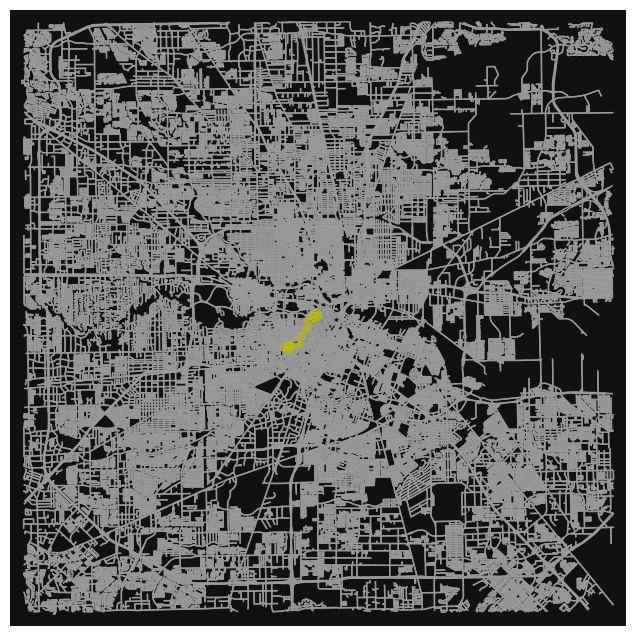

Shortest path: [1197871844, 3116217940, 152248209, 152541498, 1199379112, 1199379542, 2962628576, 152542039, 153378749, 153093639, 7674165791, 151825750, 152370730, 152791976, 152419810, 152121796, 152736084, 152189427, 152113840, 152478641, 152791979, 152791985, 152781942, 152263384, 11332582591, 152463287, 152196348, 152791991, 152546010, 152725857, 152792004, 152230519, 152230516, 152230513, 152230510, 152881512, 152328806, 152328831, 152328847]
Length of path: 3858.136


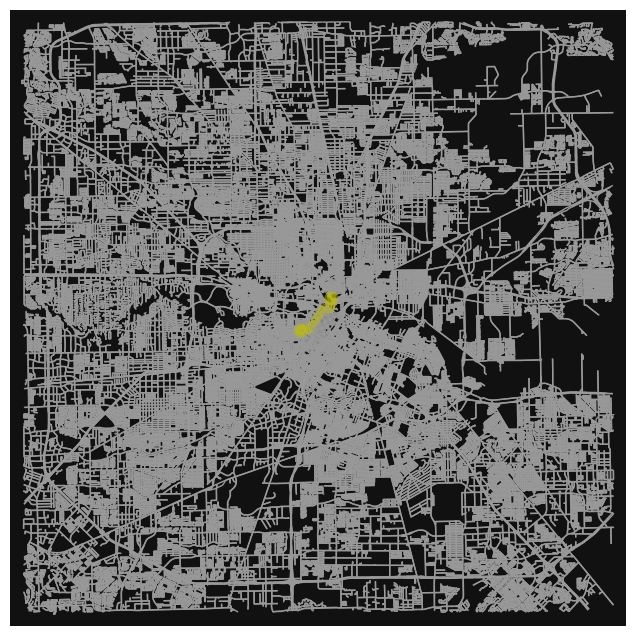

In [ ]:
# Example address: Houston, TX
address = "Houston, TX"
G = ox.graph_from_address(address, dist=20000, network_type="drive")

# Example (origin, destination) pairs:
origin_1 = (29.7604, -95.3698)  # Example location 1
destination_1 = (29.7404, -95.3898)  # Example location 2

origin_2 = (29.7704, -95.3598)  # Example location 3
destination_2 = (29.7504, -95.3798)  # Example location 4

myG = GraphL(len(nodes_list), directed=True)

for node in G.nodes():
    myG.add_node(node)  # add node

    # Loop through neighbors and add edges
    for neighbor, data in G[node].items():
        for edge_data in data.values():
            # Assuming 'length' is the edge attribute (it might differ based on the graph)
            weight = edge_data.get('length', 1)  # Default to 1 if no length is found
            myG.add_edge(node, neighbor, weight)  # Add the edge

origin_node = ox.distance.nearest_nodes(G, X=origin_1[1], Y=origin_1[0])
destination_node = ox.distance.nearest_nodes(G, X=destination_1[1], Y=destination_1[0])
myG.dijkstras_shortest_path_priorityqueue(origin_node, destination_node)
route = ox.shortest_path(G, origin_node, destination_node)
ax1 = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0)

origin_node = ox.distance.nearest_nodes(G, X=origin_2[1], Y=origin_2[0])
destination_node = ox.distance.nearest_nodes(G, X=destination_2[1], Y=destination_2[0])
myG.dijkstras_shortest_path_priorityqueue(origin_node, destination_node)
route = ox.shortest_path(G, origin_node, destination_node)
ax2 = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0)